# Star Wars Survey

## The Dataset
__[FiveThirtyEight](https://fivethirtyeight.com/)__ surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from __[their Github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)__.

In this project, we will explore the response from the survey and us it to get some insight.

In [25]:
import pandas as pd
import numpy as np
import re

starwars_df = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [26]:
starwars_df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [27]:
starwars_df.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [28]:
# Removing rows with missing values

starwars_df = starwars_df[pd.notnull(starwars_df['RespondentID'])]

In [29]:
starwars_df.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [30]:
starwars_df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [31]:
starwars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both of these columns are questions to which the answer is either yes or no. The answer can also be NaN where a respondent chooses not to answer a question. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [32]:
# Converting yes/no responses to booleans
yes_no = {'Yes' : True, 'No' : False}
starwars_df['Have you seen any of the 6 films in the Star Wars franchise?'] = starwars_df['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
starwars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = starwars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [33]:
starwars_df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, 'Which of the following Star Wars films have you seen? Please select all that apply.'

The columns for this question are:

* Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [34]:
movie_map = {'Star Wars: Episode I  The Phantom Menace' : True,
            'Star Wars: Episode II  Attack of the Clones' : True,
            'Star Wars: Episode III  Revenge of the Sith' : True,
            'Star Wars: Episode IV  A New Hope': True,
            'Star Wars: Episode V The Empire Strikes Back' : True,
            'Star Wars: Episode VI Return of the Jedi' : True,
            np.NaN : False}

for col in starwars_df.columns[3:9]:
    starwars_df[col] = starwars_df[col].map(movie_map)

In [35]:
cols_names = {'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
              'Unnamed: 4' : 'seen_2',
              'Unnamed: 5' : 'seen_3',
              'Unnamed: 6' : 'seen_4',
              'Unnamed: 7' : 'seen_5',
              'Unnamed: 8' : 'seen_6'}
starwars_df = starwars_df.rename(columns = cols_names)

In [36]:
starwars_df.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [37]:
starwars_df[starwars_df.columns[9:15]] = starwars_df[starwars_df.columns[9:15]].astype(float)

cols_names2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
              'Unnamed: 10' : 'ranking_2',
              'Unnamed: 11' : 'ranking_3',
              'Unnamed: 12' : 'ranking_4',
              'Unnamed: 13' : 'ranking_5',
              'Unnamed: 14' : 'ranking_6'}
starwars_df = starwars_df.rename(columns = cols_names2)

## Highest Ranked Movies

In [38]:
# Calculating mean ranking for each of the 6 movies
starwars_df[starwars_df.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<function matplotlib.pyplot.show>

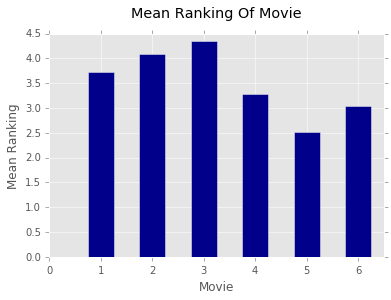

In [58]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('ggplot')

bar_positions = arange(6) + 0.75
bar_heights = starwars_df[starwars_df.columns[9:15]].mean()
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5, color='darkblue')
ax.set_xlim(0,6.5)
ax.set_title('Mean Ranking Of Movie', y = 1.05)
ax.set_xlabel('Movie')
ax.set_ylabel('Mean Ranking')
plt.show

It looks like the "original" movies are rated much more highly than the newer ones.

## Most Viewed Movies

In [40]:
starwars_df[starwars_df.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<function matplotlib.pyplot.show>

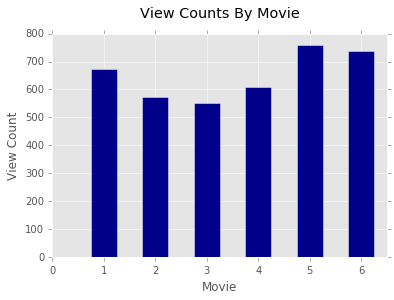

In [59]:
bar_positions2 = arange(6) + 0.75
bar_heights2 = starwars_df[starwars_df.columns[3:9]].sum()
fig, ax = plt.subplots()
ax.bar(bar_positions2, bar_heights2, 0.5, color='darkblue')
ax.set_xlim(0,6.5)
ax.set_title('View Counts By Movie', y = 1.05)
ax.set_xlabel('Movie')
ax.set_ylabel('View Count')
plt.show


It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

## Exploring Responses By Gender

In [47]:
males = starwars_df[starwars_df["Gender"] == "Male"]
females = starwars_df[starwars_df["Gender"] == "Female"]

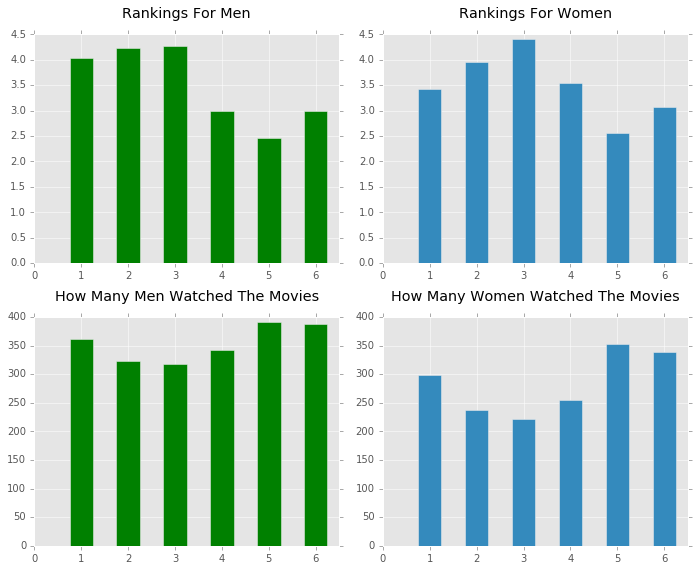

In [53]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(arange(6) + 0.75 , males[males.columns[9:15]].mean() , 0.5, color='green')
ax1.set_title('Rankings For Men', y = 1.05)
ax1.set_xlim(0,6.5)
ax2.bar(arange(6) + 0.75 , females[females.columns[9:15]].mean() , 0.5)
ax2.set_title('Rankings For Women', y = 1.05)
ax2.set_xlim(0,6.5)
ax3.bar(arange(6) + 0.75, males[males.columns[3:9]].sum(), 0.5, color='green')
ax3.set_title('How Many Men Watched The Movies', y = 1.05)
ax3.set_xlim(0,6.5)
ax4.bar(arange(6) + 0.75, females[females.columns[3:9]].sum(), 0.5)
ax4.set_title('How Many Women Watched The Movies', y = 1.05)
ax4.set_xlim(0,6.5)

plt.tight_layout()



Interestingly, more males watches episodes 1-3, but males liked them far less than females did.